# Lending Club Case Study
*By Ashish Tondon and Uday kumar Kolluru*

### Importing external modules

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Removing all Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importing the data file

In [4]:
loadData = pd.read_csv('loan.csv');

In [5]:
loadData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Clean up

**Analysing data having bank or no value**

In [6]:
# Detecting missing values in all columns
info = loadData.isna().sum()

# Checking for columns where all values are null
info[info == loadData.shape[0]].count()

54

54 columns in the dataframe have all missing values. Its better to delete them as they are of no use.

In [7]:
listOfColumnsWithAllMissingValues = list(info[info == loadData.shape[0]].index)

print("Dropping because of all missing values in Columns", str(listOfColumnsWithAllMissingValues))

loadData.drop(columns=listOfColumnsWithAllMissingValues, inplace=True)

Dropping because of all missing values in Columns ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_

Now Checking for columns which have above 40% of missing values. And We found 3 columns with above 64% of missing value. Dropping all three columns.

In [8]:
percentageOfMissingValuesInEachColumn = (loadData.isna().sum()/loadData.shape[0]) * 100

listOfColumnsWith40perMissingValues = list(percentageOfMissingValuesInEachColumn[percentageOfMissingValuesInEachColumn > 40].index)

print("Dropping because of more then 64% missing values in Columns", str(listOfColumnsWith40perMissingValues))

loadData.drop(columns=listOfColumnsWith40perMissingValues, inplace=True)

Dropping because of more then 64% missing values in Columns ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


All Entries in *delinq_amnt* and *acc_now_delinq* columns are 0. So The column is of no use we can drop them.

In [9]:
listWithZeroValues = (loadData == 0).sum().sort_values(ascending=False)

listOfColumnsWithAllZeroValues = listWithZeroValues[listWithZeroValues == loadData.shape[0]].index

loadData.drop(columns=listOfColumnsWithAllZeroValues, inplace=True)

Remaining Columns with most entries are 0

In [10]:

(loadData == 0).sum().sort_values(ascending=False)

tax_liens                     39678
chargeoff_within_12_mths      39661
collections_12_mths_ex_med    39661
out_prncp                     38577
out_prncp_inv                 38577
total_rec_late_fee            37671
pub_rec                       37601
pub_rec_bankruptcies          37339
collection_recovery_fee       35935
recoveries                    35499
delinq_2yrs                   35405
inq_last_6mths                19300
revol_bal                       994
dti                             183
total_pymnt_inv                 165
funded_amnt_inv                 129
last_pymnt_amnt                  74
total_rec_prncp                  74
total_rec_int                    71
total_pymnt                      16
last_pymnt_d                      0
open_acc                          0
last_credit_pull_d                0
policy_code                       0
initial_list_status               0
total_acc                         0
revol_util                        0
application_type            

Colums tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med mostly have 0 and missing values only. So better to drop them. As these are of no use.

In [11]:
# loadData[["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"]].isna().sum(), (loadData[["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"]] == 0).sum()
loadData.drop(columns=["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"], inplace=True)

In [12]:
loadData.groupby("initial_list_status").id.count()

initial_list_status
f    39717
Name: id, dtype: int64

**We found following details:**
1. Column 'policy_code' repeating value '1' in all rows. It means all uses "Publicly available policy".
2. Column 'application_type' repeating value 'INDIVIDUAL' in all rows. It means all borrows in the dataset are Individual borrowers.
3. Column 'pymnt_plan' repeating value 'n' in all rows. It means all borrows in the dataset opting for same borrowing plan.
4. Column 'initial_list_status' repeating value 'f' in all rows. It means all borrows in the dataset have same initial listing status.

As all rows have same value for columns policy_code, application_type, pymnt_plan, initial_list_status. And We already noted the informations these columns can provide above. Now we can drop these columns as well. As these column can not provide any other information in further analysis.

In [13]:
loadData.drop(columns=["policy_code", "application_type", "pymnt_plan", "initial_list_status"], inplace=True)

**url** column contains account link like https://lendingclub.com/browse/loanDetail.action?loan_id=<loan_id> this column will not help us in further analysis. We are dropping the column.

In [14]:
loadData.drop(columns=["url"], inplace=True)

Following ate transactional columns which is used as identifier of a loan or borrow. We do not need these columns in futher analysis.
1. id
2. member_id

In [15]:
loadData.drop(columns=["id", "member_id"], inplace=True)

In [16]:
loadData.shape

(39717, 42)

In [17]:
loadData.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Data Analysis

### Breaking Attributes as per following types:
1. Consumer Attributes: Column provides customer information.<br>
   > emp_title, emp_length, home_ownership, annual_inc, verification_status, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc, pub_rec_bankruptcies
   
2. Loan Attributes: Column provides loan information.<br>
   > loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d, loan_status, desc, purpose, title, revol_bal, revol_util, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, 

**Analyis 1**: *(Univariate Analysis)* for analysing grades of charged off loans.
- grade(loan attributes):  LC assigned loan grade
- loan_status(loan attributes): Current status of the loan

In [18]:

# grouping by the dataframe in the bases of "grade" and checking aggregate loan status.
gradeTable = loadData.groupby("grade").loan_status.value_counts().reset_index()

# Converting gradeTable to pivot table to get count of each loan status and total count in one go.
pivotGrade = pd.pivot_table(data=gradeTable, 
                       index="grade", 
                       columns="loan_status", 
                       values="count", 
                       aggfunc=np.sum, 
                       margins=True)

# Calculating Charged Off percentage
pivotGrade["Charged Off"] = pivotGrade.apply(lambda row: round((row["Charged Off"]/row.All) * 100,2), axis=1)

# Removing other columns
pivotGrade.drop(columns=["Current", "Fully Paid", "All"], inplace=True)

# Resetting the index
pivotGrade.reset_index(inplace=True)

Plotting graph with above data also remove row were grade equals to All. It was added by pivot table.

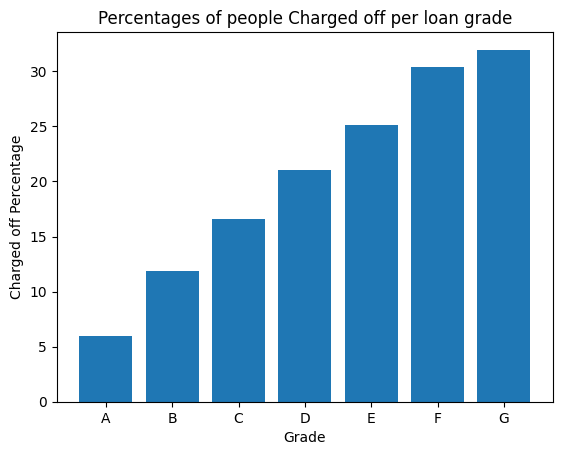

In [19]:

plt.bar(data=pivotGrade.loc[pivotGrade.grade != "All"], x="grade", height="Charged Off")

plt.xlabel("Grade")
plt.ylabel("Charged off Percentage")
plt.title("Percentages of people Charged off per loan grade")
plt.show()

**Conclusion**: As grade increase chances of "Charged off" increases. Grade and loan status has strong relation.  

---

**Analyis 2**: *(Univariate Analysis)* Analysing effect of interest rate on charged off loans
- int_rate(loan attributes):  Interest Rate on the loan
- loan_status(loan attributes): Current status of the loan

In [20]:
# Refactoring int_rate column. string to float type
loadData["int_rate"] = loadData.int_rate.apply(lambda rate: float(rate.replace("%", "")))

In above step we cleaned intrest rate column by conveting it to float values. Removed '%' sign.

In [21]:
# grouping by the dataframe in the bases of "int_rate" and checking aggregate loan status.
intRateTable = loadData.groupby("int_rate").loan_status.value_counts().reset_index()

# Converting intRateTable to pivot table to get count of each loan status and total count in one go.
pivotInterestRate = pd.pivot_table(data=intRateTable, 
                         values="count", 
                         index="int_rate", 
                         columns="loan_status", 
                         fill_value=0, 
                         margins=True, 
                         aggfunc=np.sum)

# Calculating Charged Off percentage
pivotInterestRate["Charged Off"] = pivotInterestRate.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)

# Removing other columns
pivotInterestRate.drop(labels=["All", "Fully Paid","Current"], axis=1, inplace=True)

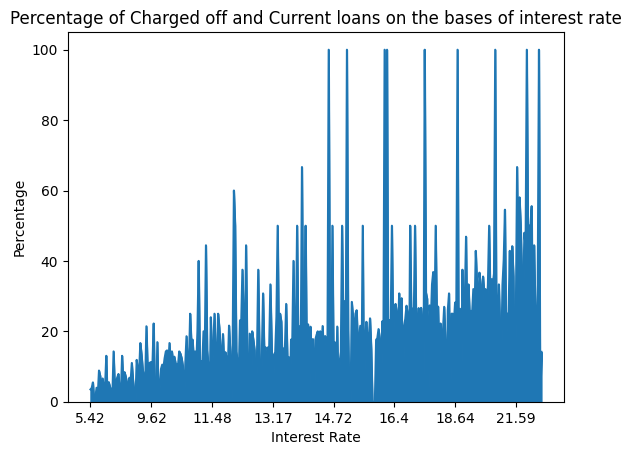

In [22]:
# Plotting area graph on the percentage of loans "called off" out of given loan in respective interest rate. 
pivotInterestRate.plot.area(legend=False)

plt.xlabel("Interest Rate")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of interest rate")

plt.show()

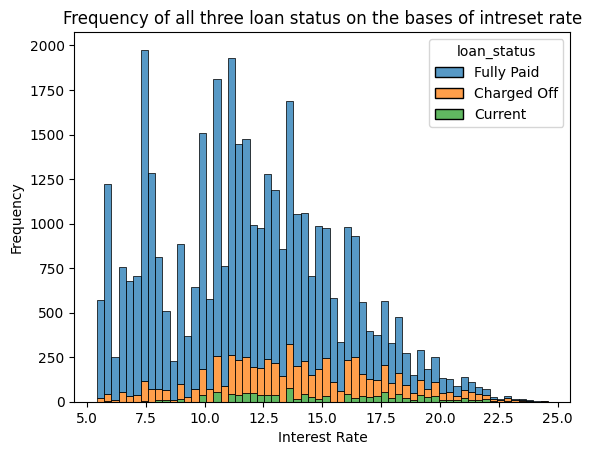

In [23]:
# Plotting histogram on the bases of interest rate with frequency. This give Bivariate plot.
sns.histplot(data=loadData, x="int_rate", hue="loan_status", multiple="stack")

plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Frequency of all three loan status on the bases of intreset rate")

plt.show()

**Conclusion**: Probability of "Charged off" increases as intrest rate increases. 

---

**Analyis 3**: *(Bivariate Analysis)* for analysing effect of loan term on charged off loans. Also the graph shows we do not have any "current" in 36 month period.
- term(loan attributes): The number of payments on the loan. Values are in months and can be either 36 or 60.
- loan_status(loan attributes): Current status of the loan

In [24]:
# grouping by the dataframe in the bases of "term" and checking aggregate loan status.
loanTermTable = loadData.groupby("term").loan_status.value_counts().reset_index()

# Converting loanTermTable to pivot table to get count of each loan status and total count in one go.
pivotLoanTerm = pd.pivot_table(data=loanTermTable, 
                          values="count", 
                          index="term", 
                          columns="loan_status", 
                          fill_value=0, 
                          margins=True, 
                          aggfunc=np.sum)

# Converting absolute value to percentage
pivotLoanTerm["Charged Off"] = pivotLoanTerm.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivotLoanTerm["Current"] = pivotLoanTerm.apply(lambda row: round((row["Current"]/row["All"])*100, 2), axis=1)

# deleting other columns
pivotLoanTerm.drop(labels=["All","Fully Paid"], axis=1, inplace=True)
pivotLoanTerm.reset_index(inplace=True)

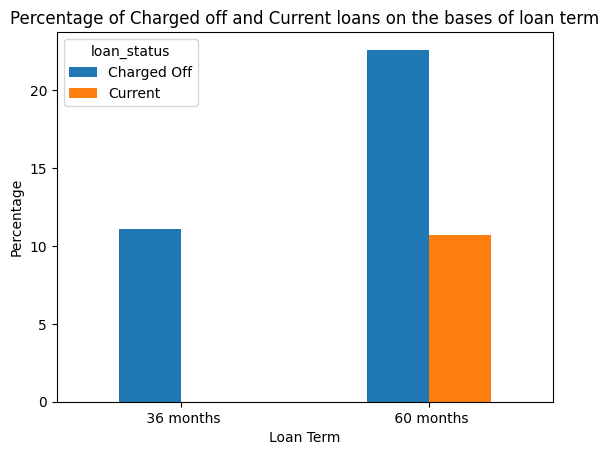

In [25]:

# Plotting graph with above data also remove row were term equals to All. It was added by pivot table.
pivotLoanTerm.loc[pivotLoanTerm.term != "All"].plot.bar(x="term")

plt.xlabel("Loan Term")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of loan term")
plt.xticks(rotation=0)

plt.show()

**Conclusion**: Chances of Charged off is high for 60 month loan period. Aslo there is no current loan in 36 month term.

---

**Analyis 4**: *(Univariate Analysis)* for analysing effect of home ownership on charged off loans.
- home_ownership(consumer attributes): The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- loan_status(loan attributes): Current status of the loan

In [26]:
# grouping by the dataframe in the bases of "home_ownership" and checking aggregate loan status.
homeOwnershipTable = loadData.groupby("home_ownership").loan_status.value_counts().reset_index()

# Converting homeOwnershipTable to pivot table to get count of each loan status and total count in one go.
pivotHomeOwnership = pd.pivot_table(data=homeOwnershipTable, 
                                    values="count", 
                                    index="home_ownership",
                                    columns="loan_status",
                                    fill_value=0,
                                    margins=True,
                                    aggfunc=np.sum)

# Converting absolute value to percentage
pivotHomeOwnership["Charged Off"] = pivotHomeOwnership.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivotHomeOwnership.sort_values(["Charged Off"], ascending=False).head(50)

# deleting other columns
pivotHomeOwnership.drop(labels=["All", "Fully Paid","Current"], axis=1, inplace=True)
pivotHomeOwnership.reset_index(inplace=True)


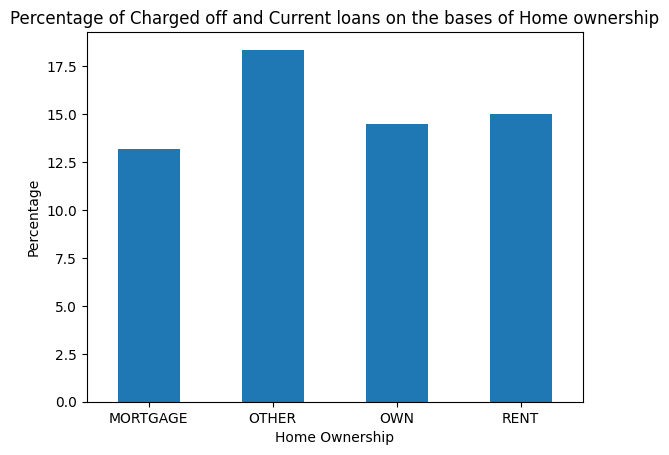

In [27]:
# Removing all rows with home_ownership as "NONE" or "All"
pivotHomeOwnership.loc[~pivotHomeOwnership.home_ownership.str.contains("NONE|All", case=False, regex=True)].plot.bar(x="home_ownership", legend=False)

plt.xlabel("Home Ownership")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off and Current loans on the bases of Home ownership")
plt.xticks(rotation=0)
plt.show()

**Conclusion**: 'Other' home ownership type has more change of get "Charged off".

---

**Analyis 5**: *(Univariate Analysis)* for analysing effect of purpose of loan mentioned on charged off loans.
- purpose(consumer attributes): A category provided by the borrower for the loan request. 
- loan_status(loan attributes): Current status of the loan.

In [28]:
# grouping by the dataframe in the bases of "purpose" and checking aggregate loan status.
purposeTable = loadData.groupby("purpose").loan_status.value_counts().reset_index()

# Converting purposeTable to pivot table to get count of each loan status and total count in one go.
pivotByPurpose = pd.pivot_table(data=purposeTable, 
                                index="purpose", 
                                columns="loan_status",
                                fill_value= 0, 
                                values="count", 
                                aggfunc=np.sum, 
                                margins=True)

# Converting absolute value to percentage
pivotByPurpose["Charged Off"] = pivotByPurpose.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivotByPurpose["Current"] = pivotByPurpose.apply(lambda row: round((row["Current"]/row["All"])*100, 2), axis=1)
pivotByPurpose["Fully Paid"] = pivotByPurpose.apply(lambda row: round((row["Fully Paid"]/row["All"])*100, 2), axis=1)


# deleting other columns
pivotByPurpose.drop(labels=["All"], axis=1, inplace=True)
pivotByPurpose.reset_index(inplace=True)
pivotByPurpose.sort_values("Charged Off", inplace=True)



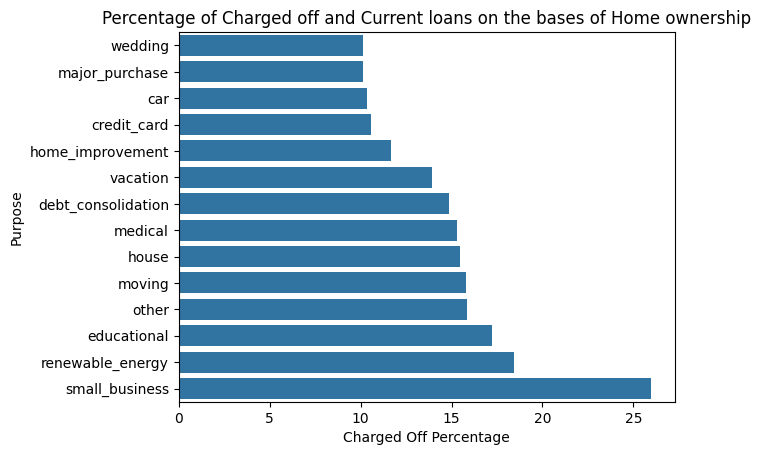

In [29]:
# Removing all rows with purpose as "All" and ploting graph.
sns.barplot(data=pivotByPurpose.loc[pivotByPurpose.purpose != "All"], y="purpose", x="Charged Off")

plt.xlabel("Charged Off Percentage")
plt.ylabel("Purpose")
plt.title("Percentage of Charged off and Current loans on the bases of Home ownership")
plt.show()

**Conclusion**: Small Business are more prone to "Charged Off".

---

**Analyis 6**: *(Bivariate Analysis)* for analysing effect of varfication status and derogatory public records on charged off loans.
- verification_status(consumer attributes): Indicates if income was verified by LC, not verified, or if the income source was verified.
- pub_rec(consumer attributes): Number of derogatory public records.
- loan_status(loan attributes): Current status of the loan.

In [30]:
# grouping by the dataframe in the bases of "verification_status" and "pub_rec". Also checking aggregate loan status.
verificationPubrecTable = loadData.groupby(["verification_status","pub_rec"]).loan_status.value_counts().reset_index()

# Converting verificationPubrecTable to pivot table to get count of each loan status and total count in one go.
pivoteVerificationPubrec = pd.pivot_table(data=verificationPubrecTable, 
                                          values="count", 
                                          index=["verification_status","pub_rec"], 
                                          columns="loan_status",
                                          fill_value=0,
                                          margins=True,
                                          aggfunc=np.sum)

# Converting absolute value to percentage
pivoteVerificationPubrec["Charged Off"] = pivoteVerificationPubrec.apply(lambda row: round((row["Charged Off"]/row["All"])*100, 2), axis=1)
pivoteVerificationPubrec["Current"] = pivoteVerificationPubrec.apply(lambda row: round((row["Current"]/row["All"])*100, 2), axis=1)

# deleting other columns
pivoteVerificationPubrec.drop(columns=["All", "Fully Paid"], inplace=True)

# deleting other rows
pivoteVerificationPubrec.drop(index="All", inplace=True)
pivoteVerificationPubrec.reset_index(inplace=True)

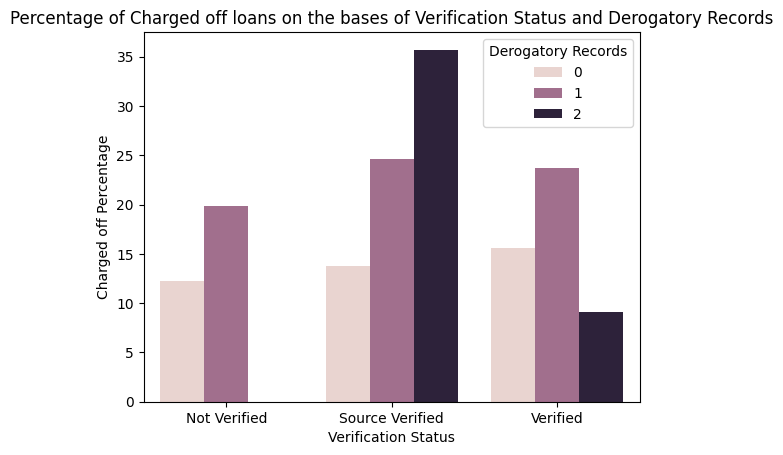

In [31]:
# Removing all rows with loan status equal to 0 and ploting graph.
sns.barplot(data=pivoteVerificationPubrec.loc[(pivoteVerificationPubrec["Charged Off"] > 0) & (pivoteVerificationPubrec["Current"] > 0)], 
            x="verification_status", 
            y="Charged Off", 
            hue="pub_rec")

plt.xlabel("Verification Status")
plt.ylabel("Charged off Percentage")
plt.title("Percentage of Charged off loans on the bases of Verification Status and Derogatory Records")
plt.legend(title="Derogatory Records")

plt.show()

**Conclusion**: Source verified loans has more number of derogatory records. Which leads to "Charged off" loans. 

---

**Analyis 7**: *(Univariate Analysis)* for analysing effect of loan inquiries in past 6 months (excluding auto and mortgage inquiries) on charged off loans.
- inq_last_6mths(consumer attributes): The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- loan_status(loan attributes): Current status of the loan.

In [50]:
# grouping by the dataframe in the bases of "inq_last_6mths" having inquires more then 0.
loanStatusInqWo = loadData.loc[loadData.inq_last_6mths > 0].groupby("loan_status").inq_last_6mths.count()

# grouping by the dataframe in the bases of "loan_status".
loanStatusInqAll = loadData.groupby("loan_status").inq_last_6mths.count()

# Join both dataframes
loanStatusInq = pd.merge(left=loanStatusInqWo, right=loanStatusInqAll, on="loan_status")

# calculating percentage of people do inquire in respective loan_status
loanStatusInq["precent"] = loanStatusInq.apply(lambda row: round((row.inq_last_6mths_x/row.inq_last_6mths_y) * 100, 2), axis=1)

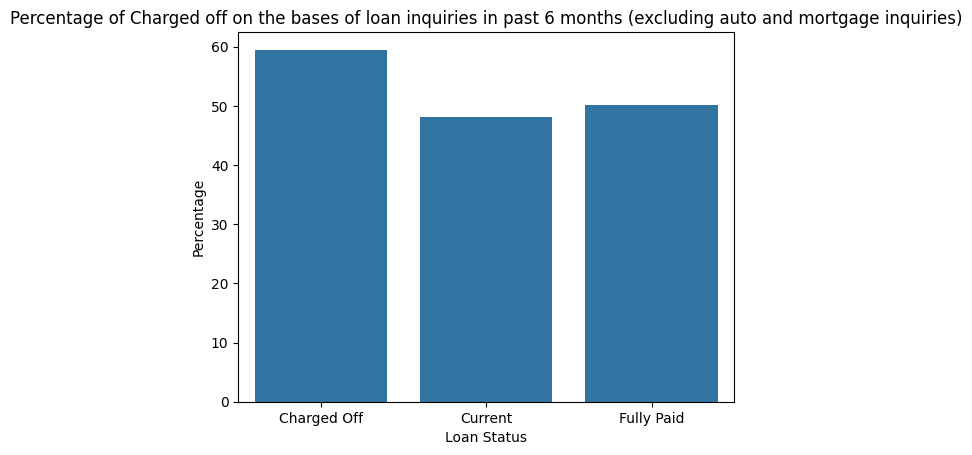

In [33]:
# Ploting graph
sns.barplot(data=loanStatusInq, x="loan_status", y="precent")

plt.xlabel("Loan Status")
plt.ylabel("Percentage")
plt.title("Percentage of Charged off on the bases of loan inquiries in past 6 months (excluding auto and mortgage inquiries)")

plt.show()

**Conclusion**: People having "Charged Off" loan tend to do more loan inquries in last 6 months.

---

**Analyis 8**: Analysing annual income with charged off users
- annual_inc(consumer attributes): The self-reported annual income provided by the borrower during registration.
- loan_status(loan attributes): Current status of the loan.

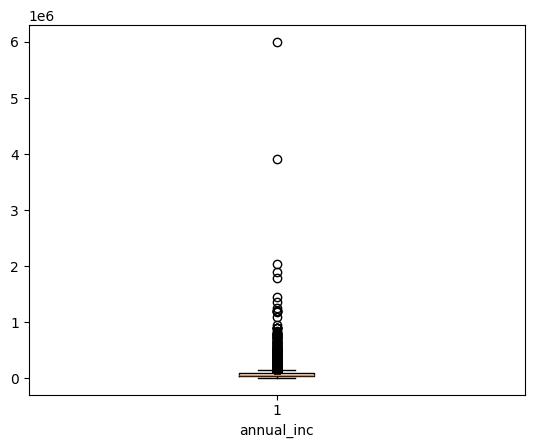

In [59]:
# Ploting box plot for analysing outliers
plt.boxplot(data=loadData, x="annual_inc")
plt.xlabel("annual_inc")
plt.show()

Removing outliers from annual income columns 

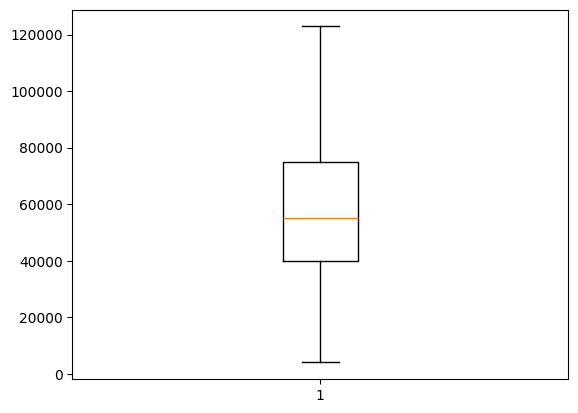

In [54]:

annulInc = loadData.loc[loadData.annual_inc < np.quantile(loadData.annual_inc, 0.92)]
plt.boxplot(data=annulInc, x="annual_inc")
plt.show()

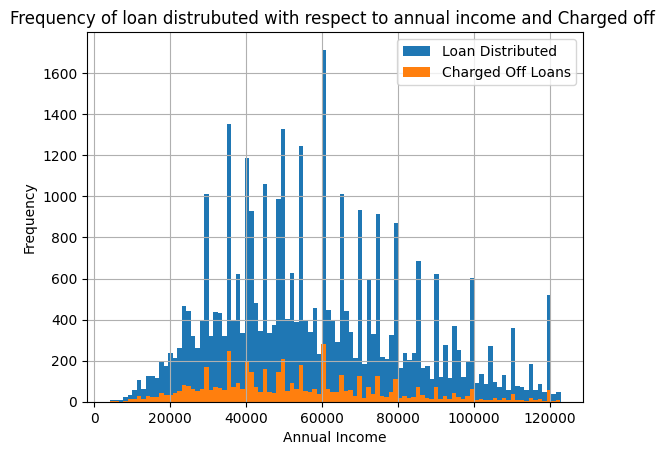

In [64]:
# Ploting graph for loan distribution as per annual income(All). With respect to annual income for "Charged Off" people.
annulInc.annual_inc.plot.hist(bins=100, grid=True, legend=True)
annulInc.loc[(loadData.loan_status == "Charged Off")].annual_inc.plot.hist(bins=100, grid=True, legend=True)
plt.legend(["Loan Distributed", "Charged Off Loans"])

plt.xlabel("Annual Income")
plt.title("Frequency of loan distrubuted with respect to annual income and Charged off ")

plt.show()

**Conclusion**: As volume of the loan increases number "Charged off" loans increases. So Annual income has no correlation with charged off loans.

---

**Analyis 9**: *(Bivariate Analysis)* Analysing employment length effect on loan status
- emp_length(consumer attributes): Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- loan_status(loan attributes): Current status of the loan.

In [67]:
# grouping by the dataframe in the bases of "emp_length" and checking aggregate loan status.
empLengthTable = loadData.groupby(["emp_length"]).loan_status.value_counts().reset_index()

# Converting empLengthTable to pivot table to get count of each loan status and total count in one go.
pivotEmpLength = pd.pivot_table(data=empLengthTable, 
                                values="count", 
                                index=["emp_length"], 
                                columns="loan_status", 
                                fill_value=0)

# Creating new Column "Year" from emp_length. This will help us to order emp_length in graph
pivotEmpLength["year"] = pivotEmpLength.reset_index().emp_length.values
pivotEmpLength["year"] = pivotEmpLength.year.apply(lambda x: x
                                                   .replace(" years", "")
                                                   .replace(" year", "")
                                                   .replace("10+", "11")
                                                   .replace("< 1", "0.9"))
pivotEmpLength["year"] = pivotEmpLength["year"].astype("float")

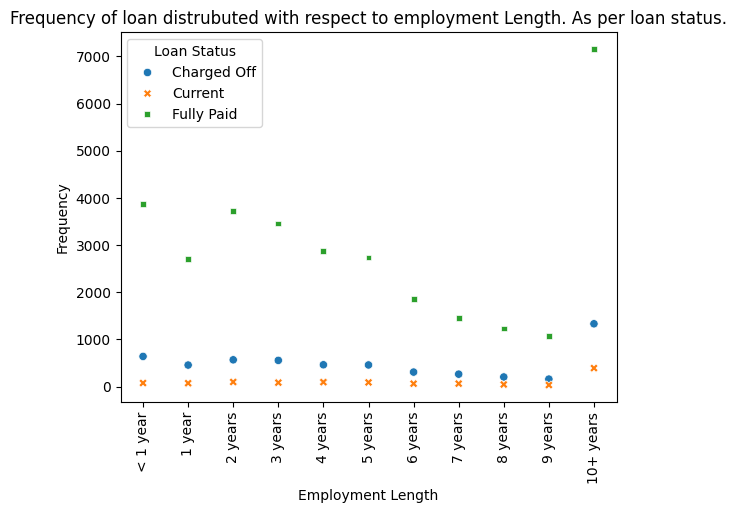

In [71]:
# Plotting graph
sns.scatterplot(data=pivotEmpLength.sort_values("year")[["Charged Off", "Current", "Fully Paid"]])
plt.xticks(rotation=90)

plt.xlabel("Employment Length")
plt.ylabel("Frequency")
plt.title("Frequency of loan distrubuted with respect to employment Length. As per loan status.")
plt.legend(title="Loan Status")

plt.show()

**Conclustion**: As per graph above employment length as no correlation with loan "Charged Off".

---

**Analyis 10**: Analysing number of open credit accounts
- open_acc(consumer attributes): The number of open credit lines in the borrower's credit file. 
- loan_status(loan attributes): Current status of the loan.

<Axes: >

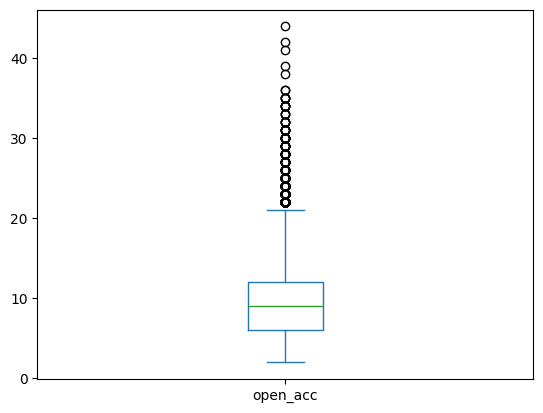

In [73]:
loadData.open_acc.plot.box()

<Axes: >

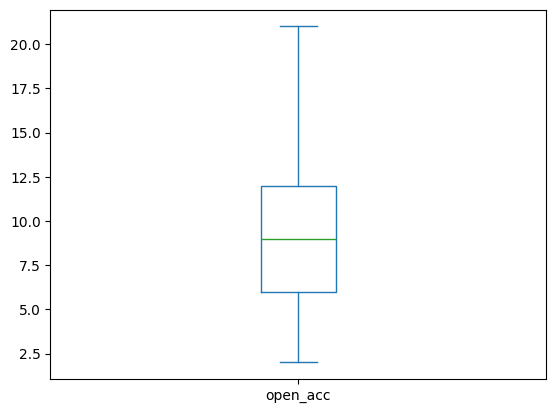

In [74]:
# Removing outliers
openAccountInfoWOOutliers = loadData.loc[loadData.open_acc < np.quantile(loadData.open_acc, 0.99)]

openAccountInfoWOOutliers.open_acc.plot.box()

In [75]:
# Group by loan_status for aggregating open_acc
anlyOpenAcc = openAccountInfoWOOutliers.groupby("loan_status").open_acc.value_counts().reset_index().sort_values(["loan_status", "open_acc"])

# Creating Pivot table
pivotOpenAcc = pd.pivot_table(data=anlyOpenAcc, index="open_acc", columns="loan_status")
pivotOpenAcc.reset_index(inplace=True)

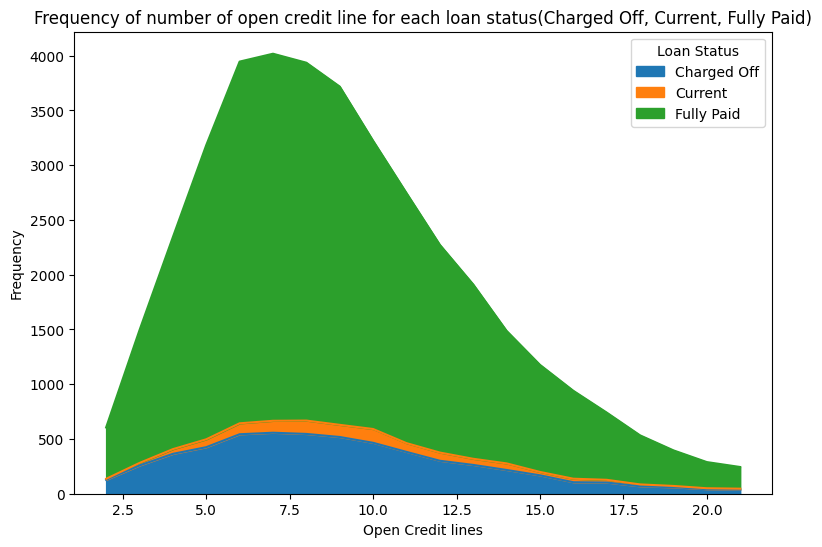

In [78]:
# Ploting graph
pivotOpenAcc.plot(kind="area", figsize=(9, 6), x="open_acc", y="count")
plt.xlabel("Open Credit lines")
plt.ylabel("Frequency")
plt.title("Frequency of number of open credit line for each loan status(Charged Off, Current, Fully Paid)")
plt.legend(title="Loan Status")

plt.show()

**Conclusion**: Open Credit line has no correlation with charged off loans

---

**Analyis 11**: for analysing ratio of monthly installments and income on charged off loans
- dti(consumer attributes): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- loan_status(loan attributes): Current status of the loan.

In [82]:
# grouping by the dataframe in the bases of "loan_status" and checking aggregate loan status.
dtiTable= loadData.groupby("loan_status").dti.value_counts().reset_index()

# Converting loanTermTable to pivot table to get count of each loan status.
pivotDti = pd.pivot_table(data=dtiTable, index="dti", columns="loan_status", values="count", fill_value=0)

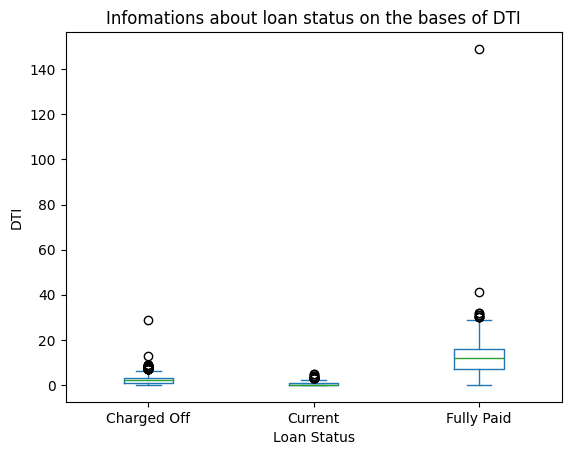

In [85]:
# Ploting Box
pivotDti.plot.box()

plt.xlabel("Loan Status")
plt.ylabel("DTI")
plt.title("Infomations about loan status on the bases of DTI")

plt.show()

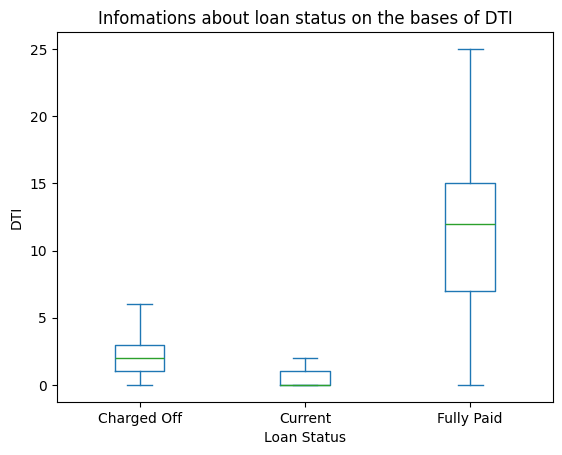

In [87]:
pivotDti.loc[(pivotDti["Fully Paid"] < np.quantile(pivotDti["Fully Paid"],0.99)) & 
         (pivotDti["Charged Off"] < np.quantile(pivotDti["Charged Off"],0.99))  & 
         (pivotDti["Current"] < np.quantile(pivotDti["Current"],0.99))].plot.box()

plt.xlabel("Loan Status")
plt.ylabel("DTI")
plt.title("Infomations about loan status on the bases of DTI")

plt.show()

Outliers Cleaning

**Conclusion**: Median of DTI(Dept to Income Ratio) of Fully Paid loans are more. It means DTI has no relation on charged off loans. 

---

**Analyis 12**: Analysing orrower's earliest reported credit line month on charged off loans.
- earliest_cr_line(consumer attributes): The month the borrower's earliest reported credit line was opened.
- loan_status(loan attributes): Current status of the loan.

In [42]:
# converting string to date and get year out of it
loadData["earliest_cr_line_year"] = pd.to_datetime(loadData.loc[loadData.earliest_cr_line.notna()].earliest_cr_line.apply(lambda x: f'01-{x}')).dt.year

<Axes: >

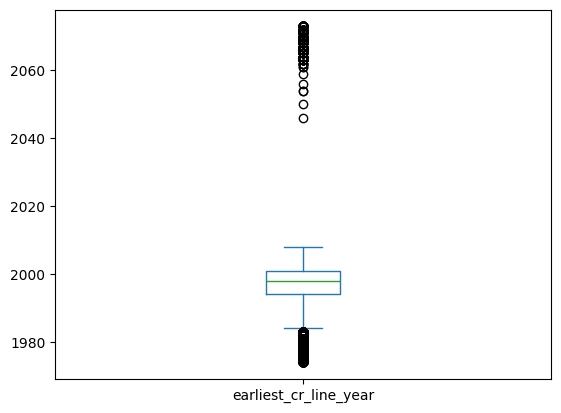

In [43]:
# checking for outliers
loadData["earliest_cr_line_year"].plot.box()

Cleaning outliners

<Axes: >

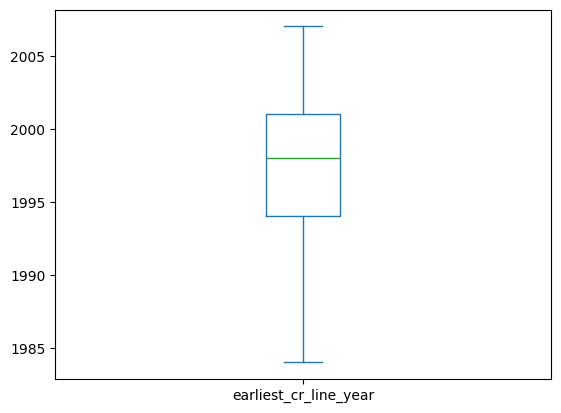

In [89]:
# clieaning outliers
erCredicLineYear = loadData.loc[(loadData.earliest_cr_line_year > np.quantile(loadData.earliest_cr_line_year, 0.04)) & 
             (loadData.earliest_cr_line_year < np.quantile(loadData.earliest_cr_line_year, 0.99))]
erCredicLineYear["earliest_cr_line_year"].plot.box()

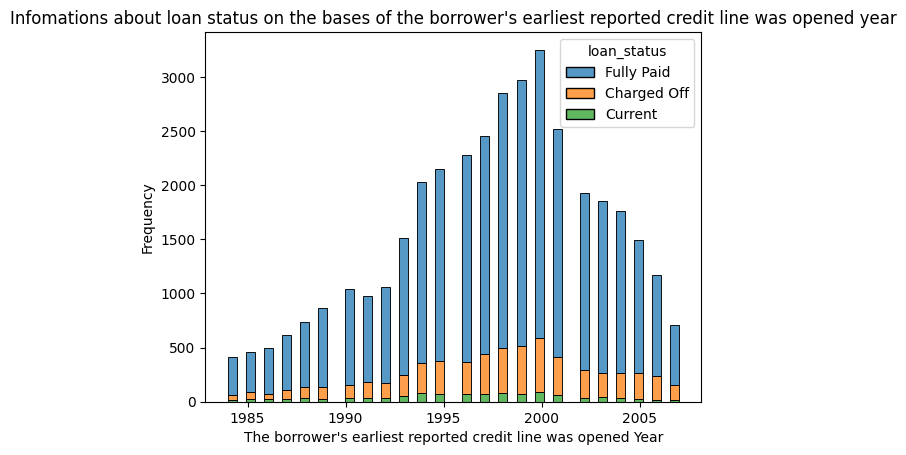

In [99]:
# Creating frequencey histogram for earliest_cr_line year
sns.histplot(data=erCredicLineYear, x="earliest_cr_line_year", hue="loan_status", bins=50, multiple="stack")

plt.xlabel("The borrower's earliest reported credit line was opened Year")
plt.ylabel("Frequency")
plt.title("Infomations about loan status on the bases of the borrower's earliest reported credit line was opened year")

plt.show()

**Conclusion**: As per graph charged off loan increases with volume of the loans in each year. The borrower's earliest reported credit line open year do not have direct correlation with loan status.

---

**Analyis 13**: Analysing at pricipal out standing charged off loan installments get stopped.
- total_rec_prncp(loan attributes): Principal received to date.
- funded_amnt(loan attributes): The total amount committed to that loan at that point in time.

In [95]:
# Calculating Principal revived 
loadData["out_standing"] = loadData.apply(lambda row: row.funded_amnt - row.total_rec_prncp, axis=1)

# Calculating percentage of outstanding amount.
loadData["out_standing_percent"] = loadData.apply(lambda row: round((row.out_standing/row.funded_amnt) * 100, 2), axis=1)

In [96]:

# grouping by the dataframe in the bases of "out_standing_percent" and checking aggregate loan status.
OutStandingPrincipleTable = loadData.groupby("out_standing_percent").loan_status.value_counts().reset_index()

# Converting OutStandingPrincipleTable to pivot table to get count of each loan status and total count in one go.
pivotOutStandingPr = pd.pivot_table(data=OutStandingPrincipleTable, 
                                    index="out_standing_percent", 
                                    columns="loan_status", 
                                    values="count", 
                                    fill_value=0).reset_index()

# Removing fully paid loans
pivotOutStandingPr.loc[pivotOutStandingPr.out_standing_percent > 0]


loan_status,out_standing_percent,Charged Off,Current,Fully Paid
1,0.01,0.0,0.0,1.0
2,0.06,0.0,0.0,1.0
3,0.10,0.0,1.0,2.0
4,0.12,0.0,0.0,1.0
5,0.14,0.0,1.0,1.0
...,...,...,...,...
4509,99.01,1.0,0.0,0.0
4510,99.03,1.0,0.0,0.0
4511,99.04,2.0,0.0,0.0
4512,99.07,1.0,0.0,0.0


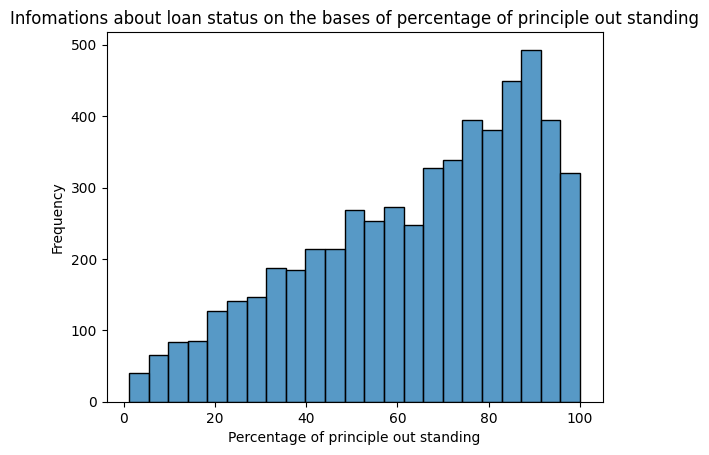

In [98]:
# Ploting histogram for charged off loans as per percentage of principle out standing
sns.histplot(data=loadData.loc[(loadData.out_standing_percent > 0) & (loadData.loan_status == "Charged Off")], x="out_standing_percent")

plt.xlabel("Percentage of principle out standing")
plt.ylabel("Frequency")
plt.title("Infomations about loan status on the bases of percentage of principle out standing")

plt.show()


**Conclusion**: Mosty charged off loan installments stops at initial tenure of the loans.

**Following are strong driver variables**:
1) Grade
2) Interest Rate
3) Loan Term
4) Home Ownership
5) Purpose of loan
6) Verification Status
7) pub_rec (Number of derogatory public records)
8) inq_last_6mths (The number of inquiries in past 6 months)
9) total_rec_prncp (Principal received to date.) 